In [1]:
import jieba
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import TfidfVectorizer 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
#加载停用词
stopwords=pd.read_csv('data\\stopwords.txt',index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')
stopwords=stopwords['stopword'].values

In [3]:
#加载语料
music_df = pd.read_csv('data\\ChengDu（Ultra）.csv',encoding='utf-8', header=None, names=['content'])
#删除语料的nan行
music_df.dropna(inplace=True)
#转换
music = music_df['content'].tolist()
music_df.head()

,content
0,你真的红了很开心内场票也可以卖到虽然以前就能听你的越来越听不起你的演唱会不过没关系我会努力变...
1,我是一位土生土长的成都姑娘所有成都的回忆都汇成这首歌喜欢赵雷已经三年了年第一次在沈阳看赵雷演...
2,为什么你们成都有成都我们石家庄就只能杀死那个石家庄人
3,当初一首郝云的去大理然我义无反顾的背起行囊去了云南现在听到赵雷的成都好吧我正在定机票那么多年...
4,我是安徽人高考填志愿我一本我女朋友二本为了能和她在一起我降分到二本和她一起来到了成都不管选择...


In [4]:
#定义分词和打标签函数preprocess_text
    #参数content_lines即为上面转换的list
    #参数sentences是定义的空list，用来储存打标签之后的数据
def preprocess_text(content_lines, sentences):
    for line in content_lines:
        segs = jieba.lcut(line)
        segs = [v for v in segs if not str(v).isdigit()]  #去数字
        segs = list(filter(lambda x: x.strip(), segs))  #去左右空格
        segs = list(filter(lambda x: len(x) > 1, segs))  #长度为1的字符
        segs = list(filter(lambda x: x not in stopwords, segs))  #去掉停用词
        sentences.append((" ".join(segs)))  # 打标签

# 绘制聚类中心
def plot_cluster(result, newData, numClass):
    plt.figure(figsize=(6, 4))
    Lab = [[] for i in range(numClass)]
    index = 0
    for labi in result:
        Lab[labi].append(index)
        index += 1
    color = ['oy', 'ob', 'og', 'cs', 'ms', 'bs', 'ks', 'ys', 'yv', 'mv', 'bv', 'kv', 'gv', 'y', 'm', 'b', 'k', 'g'] * 3
    for i in range(numClass):
        x1 = []
        y1 = []
        for ind1 in newData[Lab[i]]:
            try:
                y1.append(ind1[1])
                x1.append(ind1[0])
            except:
                pass
        plt.plot(x1, y1, color[i])
    #绘制初始中心点
    x1 = []
    y1 = []
    for ind1 in clf.cluster_centers_:
        try:
            y1.append(ind1[1])
            x1.append(ind1[0])
        except:
            pass
    plt.plot(x1, y1, "rv")  # 绘制中心
    plt.show()

In [5]:
#调用函数，生成训练集
sentences = []
preprocess_text(music,sentences)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\24835\AppData\Local\Temp\jieba.cache
Loading model cost 0.533 seconds.
Prefix dict has been built successfully.


In [6]:
for sentence in sentences[:10]:
    print(sentence)

开心 内场 越来越 听不起 演唱会 没关系 我会 努力 变得 民谣 值得 难过 日子 普通人 想要 买房 结婚 姑娘 赵雷
一位 土生土长 成都 姑娘 成都 回忆 汇成 喜欢 赵雷 三年 第一次 沈阳 赵雷 演出 大二 满满的 对家 回忆 男朋友 日子 迷笛 草莓 赵雷 现场 昆明 研究生 成都 工作 成都 领证
成都 成都 石家庄 只能 杀死 石家庄
当初 一首 郝云 大理 义无反顾 背起 行囊 云南 听到 赵雷 成都 机票 多年 听的歌 腾格尔 天堂
安徽 高考 填志愿 一本 女朋友 二本 我降 分到 二本 来到 成都 选择 至少 后悔 喜欢 城市 喜欢 成都 那种 情怀 听到 总有 一小块 地方 触动 五年
年前 成都 大学 七年 大学毕业 含泪 分手 五年 两年 五年 互相联系 情况 结束 失败 婚姻 一年 毫不犹豫 抓紧 再也 放弃 两个 结婚 成都 留下 爱情
靠靠 终于 开曲 两秒钟 尖叫
第一次 成都 音质 不清 版本 女生 四川 口音 吃火锅 成都 微博上 钢琴 纯净 版短 难忘 第三版 成都 时光 西安 演唱会 打开 手电筒 副歌 旋律 重复 星空 闪耀 公车 很挤 音乐 拯救 一刻 最终 成都
喜欢 街头 酒吧 草地 青岛 大海 对面 这首 熟悉 歌谣 个中滋味 体会 踏上 一段 美妙 搭车 民谣 旅行 期待 成都 相遇 成都 街头 哼唱 把手 揣进 裤兜 坐在 小酒馆 门口 一个个 静静的 消失 灯光 尽头 选择 人生
一首歌 怀念 一座 天府广场 武侯祠 锦里 杜甫 草堂 青羊宫 春熙路 宽窄 巷子 昭觉寺 文殊院 回忆


In [7]:
#将文本中的词语转换为词频矩阵 矩阵元素a[i][j] 表示j词在i类文本下的词频
vectorizer = TfidfVectorizer(sublinear_tf=True, max_features=23)
# 统计每个词语的tf-idf权值
transformer = TfidfTransformer()
# 计算tf-idf
tfidf = vectorizer.fit_transform(sentences)
# 获取词袋模型中的所有词语
word = vectorizer.get_feature_names()
print(word)
# 将tf-idf矩阵抽取出来，元素w[i][j]表示j词在i类文本中的tf-idf权重
weight = tfidf.toarray()
#查看特征大小
print ('Features length: ' + str(len(word)))

['加油', '听到', '喜欢', '回忆', '地方', '城市', '好听', '希望', '幸福', '感觉', '成都', '我会', '故事', '民谣', '生活', '祝福', '第一次', '网易', '街头', '评论', '谢谢', '赵雷', '音乐']
Features length: 23


In [8]:
numClass = 11  # 聚类分几簇
clf = KMeans(n_clusters=numClass,max_iter=10000,init="k-means++",tol=1e-6)
pca = PCA(n_components=2)  # 输出两维
TnewData = pca.fit_transform(weight)
s = clf.fit(TnewData)
print("s:",s)

s: KMeans(max_iter=10000, n_clusters=11, tol=1e-06)


In [9]:
result = list(clf.predict(TnewData))#查看聚类结果
print(result)

[1, 7, 2, 7, 6, 2, 1, 8, 6, 1, 0, 0, 2, 4, 0, 1, 1, 1, 2, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 2, 7, 6, 2, 1, 8, 6, 1, 0, 0, 2, 4, 0, 1, 1, 1, 2, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 6, 1, 1, 7, 2, 2, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 9, 9, 7, 3, 1, 1, 9, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 10, 1, 1, 1, 4, 1, 1, 1, 1, 1, 7, 1, 1, 1, 9, 1, 1, 9, 1, 1, 1, 1, 1, 1, 9, 4, 1, 1, 0, 1, 10, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 9, 1, 1, 9, 1, 1, 8, 5, 9, 1, 1, 1, 4, 1, 9, 1, 9, 3, 1, 3, 1, 1, 1, 4, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 4, 7, 1, 7, 1, 1, 1, 1, 2, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 9, 1, 4, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 9, 1, 2, 1, 1, 9, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 6, 1, 1, 1, 9, 4, 1, 1, 1, 1, 1, 1, 9, 1, 7, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 9, 1, 1, 1, 1

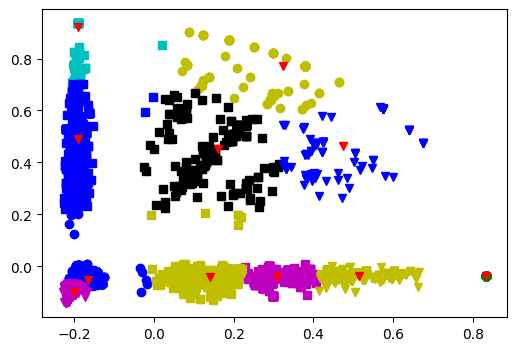

In [10]:
pca = PCA(n_components=2)#输出二维
newData = pca.fit_transform(weight)
plot_cluster(result,newData,numClass)

In [11]:
music_df['labels'] = result  # 贴标签
music_df.head()

,content,labels
0,你真的红了很开心内场票也可以卖到虽然以前就能听你的越来越听不起你的演唱会不过没关系我会努力变...,1
1,我是一位土生土长的成都姑娘所有成都的回忆都汇成这首歌喜欢赵雷已经三年了年第一次在沈阳看赵雷演...,7
2,为什么你们成都有成都我们石家庄就只能杀死那个石家庄人,2
3,当初一首郝云的去大理然我义无反顾的背起行囊去了云南现在听到赵雷的成都好吧我正在定机票那么多年...,7
4,我是安徽人高考填志愿我一本我女朋友二本为了能和她在一起我降分到二本和她一起来到了成都不管选择...,6


In [12]:
#存储
music_df.to_csv('data\\labels.csv')

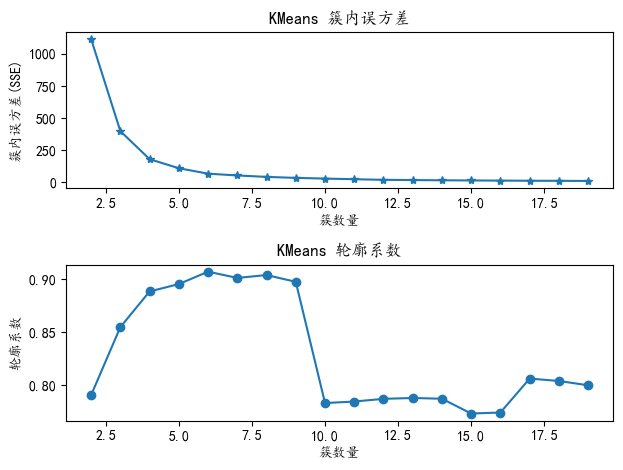

In [13]:
def km_sse_cs():
    """
    KMeans算法效果评价
    1、簇内误方差(SSE, sum of the squared errors)，手肘法，肘部法，其大小表明函数拟合的好坏。
    使用图形工具肘部法，根据簇的数量来可视化簇内误方差。下降率突然变缓时即认为是最佳的k值（拐点）。
    当KMeans算法训练完成后，可以通过使用内置inertia属性来获取簇内的误方差。
    2、轮廓系数法（Silhouette Coefficient）结合了聚类的凝聚度（Cohesion）和分离度（Separation）
    平均轮廓系数的取值范围为[-1,1]，系数越大，聚类效果越好。当值为负时，暗含该点可能被误分了。
    :return:
    """
    # 存放设置不同簇数时的SSE值
    sse_list = []
    # 轮廓系数
    silhouettes = []
    
    data=TnewData
    # 循环设置不同的聚类簇数
    for i in range(2, 20):
        model = KMeans(n_clusters=i)
        model.fit(data)
        # kmeans算法inertia属性获取簇内的SSE
        sse_list.append(model.inertia_)
        # 轮廓系数
        silhouette = metrics.silhouette_score(data, model.labels_, metric='euclidean')
        silhouettes.append(silhouette)
    # 绘制簇内误方差曲线
    plt.subplot(211)
    plt.title('KMeans 簇内误方差')
    plt.plot(range(2, 20), sse_list, marker='*')
    plt.xlabel('簇数量')
    plt.ylabel('簇内误方差(SSE)')
    # 绘制轮廓系数曲线
    plt.subplot(212)
    plt.title('KMeans 轮廓系数')
    plt.plot(range(2, 20), silhouettes, marker='o')
    plt.xlabel('簇数量')
    plt.ylabel('轮廓系数')

    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    import matplotlib as mpl
    # 汉字字体,优先使用楷体，如果找不到楷体，则使用黑体
    mpl.rcParams['font.sans-serif'] = ['KaiTi', 'SimHei', 'FangSong']
    # KMeans算法
    km_sse_cs()